## <center> École Polytechnique de Montréal <br> Département Génie Informatique et Génie Logiciel <br>  INF8460 – Traitement automatique de la langue naturelle <br> </center>
## <center> TP4 - Les LLMs et la génération augmentée de récupération (RAG) pour les questions-réponses<br> Automne 2024 </center>


## Identification de l'équipe:

### Groupe de laboratoire:

### Equipe numéro :

### Membres:

- membre 1 (% de contribution, nature de la contribution)
- membre 2 (% de contribution, nature de la contribution)
- membre 3 (% de contribution, nature de la contribution)

* nature de la contribution: Décrivez brièvement ce qui a été fait par chaque membre de l’équipe. Tous les membres sont censés contribuer au développement. Bien que chaque membre puisse effectuer différentes tâches, vous devez vous efforcer d’obtenir une répartition égale du travail. Soyez précis ! N'indiquez pas seulement : travail réparti équitablement

## 1. Introduction

### 1.1. Description du TP4

Dans ce TP, vous allez travailler sur un système de **génération augmentée de récupération**, ou **RAG** (pour Retrieval Augmented Generation en anglais) qui combine des modèles de langue génératifs et de recherche d'information.

Étant donnée une question, il faudra retrouver les passages les plus pertinents  avec un modèle de recherche. Ensuite, il faudra générer une réponse à la question en utilisant ces passages de texte. Vous aurez finalement à trouver des manières d'améliorer les performances de votre modèle RAG.

L'ensemble est noté sur 100 points.

### Description des données

Les passages donnés sont des textes en anglais de quelques phrases sur divers sujets. Par exemple, les mathématiques, la physique, la chimie, la biologie l'informatique, la musique et la psychologie. En général, les textes abordent des sujets très spécifiques reliés à un domaine. Par exemple, il pourrait y avoir 1000 textes parlant d'informatique et 100 qui abordent, à leur manière, la notion de mémoire. Parmi ces 100 passages, 5 pourraient aborder la mémoire dans un processeur spécifique.

En ce qui concerne les questions, elles sont basées sur les sujets de certains textes précis et on peut y répondre à l'aide d'au moins un des textes. Dans certains cas, plusieurs textes sont nécessaires pour répondre à la question. Par exemple, plusieurs textes pourraient aborder le processeur Intel i7-13700k, mais la question pourrait nécessiter l'information de tous ces textes pour trouver la réponse. 
Les questions ont été créées pour faire en sorte que les réponses soient assez courtes. Il peut s'agir d'un simple nombre ou de quelques mots (< 30 mots).


Vous trouverez ~ 13 000 passages dans le corpus pour ~ 1 700 paires de questions / réponses dans le jeu d'entraînement et ~ 500 dans le jeu de validation. Vous devez prédire 500 réponses aux questions du jeu de test.

### Exemple

Par exemple, pour la question

> What type of bonds are used to form branches in glycogen?

Avec l'approche RAG, plutôt que de générer la réponse directement, on va d'abord chercher dans un corpus de passages. Dans cet exemple, un des passages pertinents est :

> **Glycogen Structure and Function** : Glycogen is a molecular polymer of glucose used for energy storage. It is composed of linear chains of glucose molecules linked by α-1,4-glycosidic bonds, with branches formed off the chain via α-1,6-glycosidic bonds. The branches provide additional ""free ends"" for linear chains, allowing for faster glucose release.

Puis on génère une réponse conditionnée par les passages pertinents :

> α-1,6-glycosidic bonds

### Motivation

Le RAG est une approche très populaire en ce moment. Elle permet notamment d'avoir des sources qui supportent les réponses générées, ce qui peut être utile pour la vérification de faits ou pour contrôler les hallucinations. De plus, elle permet d'intégrer des connaissances externes et récentes dans les modèles de génération sans avoir à les ré-entraîner.

### Objectif du TP

Dans ce TP, vous implémenterez plusieurs systèmes de question-réponse. D'abord, vous testerez une approche de prompting qui n'utilise aucun passage pour aider le modèle de génération. Puis vous implémenterez un système figé qui utilise un modèle de plongements figé pour retrouver les $k$ passages les plus pertinents. Ces passages seront ensuite donnés à un modèle de génération figé aussi.

Enfin, vous implémenterez votre propre méthode dans l'objectif d'atteindre les meilleures performances dans la compétition Kaggle.

### Jeux de données

Vous avez 4 fichiers à votre disposition :
- 'rag_texts.csv' : le corpus de passages extraits de Wikipédia.
  - **id** : l'identifiant unique du passage.
  - **text** : le texte du passage.
- 'rag_questions_train.csv', 'rag_questions_val.csv' et 'rag_questions_test.csv' : les questions d'entraînement, de validation et de test.
  - **id** : l'identifiant unique de la question.
  - **question** : La question.
  - **text_id** (sauf pour le fichier de test) : la liste des identifiants des passages pertinents du corpus 'rag_texts.csv' pour la question.
  - **answer** (sauf pour le fichier de test) : la réponse à la question.

### Contraintes

- **Modèle génératif** : pour des raisons d'équité, le seul modèle de génération que vous pouvez utiliser est [microsoft/Phi-3-mini-128k-instruct](https://huggingface.co/microsoft/Phi-3-mini-128k-instruct), disponible sur Hugging Face. Cette contrainte permet de mieux comparer les différentes approches et d'éviter que la performance soit uniquement due à un modèle de génération plus performant.
- Données externes : vous ne pouvez pas utiliser de données externes pour entraîner vos modèles, seulement les données fournies.
- Modèles de plongements à utiliser: [BAAI/bge-small-en-v1.5](https://huggingface.co/BAAI/bge-small-en-v1.5)

### 1.2. Librairies permises

Vous pouvez utiliser les librairies suivantes
- Numpy
- Pandas
- HuggingFace
- nltk
- SpaCy
- PyTorch
- faiss
- Langchain
- re


- Pour toute autre librairie, demandez à votre chargé de laboratoire

### 1.3. Infrastructure

- Vous avez accès aux GPU du local L-4818. Dans ce cas, vous devez utiliser le dossier temp (voir le tutoriel VirtualEnv.pdf)
- Vous pouvez aussi utiliser l’environnement Google Colab :  https://colab.research.google.com/

### 1.4. Remise

### Échéance

Fin de la session. La date précise sera indiquée dans les boites de remise sur Moodle.


### Livrables

Vous devez remettre votre notebook sur Moodle et Gradescope en ipynb et pdf. Pour Gradescope vous devez associer les numéros de questions avec vos réponses dans le pdf grâce à l'outil que fournit Gradescope.


### Critères
1. Implantation correcte et efficace
2. Richesse de la solution proposée
3. Qualité du code (noms significatifs, structure, performance, gestion d’exception, etc.)
4. Commentaires clairs et informatifs
5. Aspect novateur
6. État de l'art synthétisé
7. Performance attendue des modèles
8. Réponses correctes/sensées aux questions de réflexion ou d'analyse

### CODE D’HONNEUR
- __Règle 1__:  Le plagiat de code est bien évidemment interdit. Toute utilisation de code doit être référencée adéquatement. L’utilisation de code ne peut concerner que les architectures de base (par exemple le Transformer). Vous __ne pouvez pas__ soumettre un code écrit par quelqu’un d’autre.
- __Règle 2__: Vous êtes libres de discuter des idées et des détails de mise en œuvre avec d'autres équipes. Cependant, vous ne pouvez en aucun cas consulter le code d'une autre équipe INF8460, ou incorporer leur code dans votre TP.
- __Règle 3__:  Vous ne pouvez pas partager votre code publiquement (par exemple, dans un dépôt GitHub public) tant que le cours n'est pas fini.


### 1.5. Kaggle

La compétion Kaggle sera accessible ici: https://www.kaggle.com/t/c970abbf273b4e13a642fce3bfe219be.

Vous devez recréer des équipes de 3 personnes sur Kaggle avec le même nom d'équipe que sur Moodle ainsi que les mêmes membres.

Le TP4 se fera sous forme d’une compétition Kaggle.  Vous devrez utiliser l’environnement Kaggle pour la soumission et l’évaluation de vos meilleurs modèles.  
Pour tester votre modèle au fur et à mesure, vous aurez le droit à 4 soumissions par jour sur Kaggle. Il y aura deux types de résultats : votre « private leaderboard » et votre « public leaderboard » :
- Le « public leaderboard » est calculé sur approximativement 30% des données de test, choisies aléatoirement par Kaggle. Ce score est public et est calculé sur la même tranche de données pour tous les participants.
- Le « private leaderboard » est calculé sur approximativement 70% des données de test et n’est visible qu’à la fin de la compétition. Le résultat final sera basé sur ce leaderboard. Si aucune soumission n’est choisie, la soumission avec le meilleur score sur le « public leaderboard » sera utilisée pour calculer le score sur le « private leaderboard ».

Pour l’évaluation, vous devrez soumettre un fichier de données _tp4_submission.csv_ du même format que le fichier _sample_submission.csv_ (disponible sur le site de la compétition et Moodle).


### 1.6. Description des données et métriques d’évaluation

Dans votre fichier de soumission, il doit y avoir une colonne _id_ et une colonne _answer_. La colonne _id_ doit correspondre à l'identifiant unique de la question et la colonne _answer_ doit correspondre à la réponse générée par votre modèle.

Nous utiliserons la métrique **BLEU**, vue en cours, pour évaluer les réponses générées par rapport au jeu de référence (gold standard).

In [1]:
# Import des librairies

import os
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from typing import Optional
from transformers import AutoTokenizer, AutoModel, AutoModelForCausalLM, pipeline, BitsAndBytesConfig
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from datasets import load_dataset
from transformers import AutoModelForCausalLM, AutoTokenizer
from nltk.translate.bleu_score import sentence_bleu
import nltk
import faiss

ModuleNotFoundError: No module named 'datasets'

In [2]:
# Si vous stockez vos données sur Google Drive

# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
root_path = './'
data_path = root_path + 'data/'

## 2. Analyse exploratoire et modèle de génération simple (15 points)

Pour commencer ce TP, et pour fixer des modèles de base (baselines), vous allez utiliser un modèle de génération simple pour répondre aux questions. Vous utiliserez le modèle de génération **'microsoft/Phi-3-mini-128k-instruct'** disponible sur Hugging Face. Dans cette partie, vous devez simplement générer des réponses aux questions de l'ensemble de validation (_questions_val.csv_) sans utiliser de passages pour aider le modèle.

### 2.1. Chargement des données (5 points)

#### 2.1.1 Taille des données (1 point)

Affichez la taille de tous les jeux de données et quelques questions de l'ensemble d'entraînement

In [32]:
# TODO
texts_data = pd.read_csv(data_path + 'texts.csv')
train_data = pd.read_csv(data_path + 'questions_train.csv')
test_data = pd.read_csv(data_path + 'questions_test.csv')
val_data = pd.read_csv(data_path + 'questions_val.csv')

# Afficher la taille des jeux de données
print("Taille des jeux de données :")
print("Texts : ", texts_data.shape)
print("Train : ", train_data.shape)
print("Test : ", test_data.shape)
print("Val : ", val_data.shape)

print("\nPremières questions de l'ensemble d'entrainement :")
train_data.head()

# END TODO

Taille des jeux de données :
Texts :  (13314, 3)
Train :  (1747, 6)
Test :  (500, 3)
Val :  (500, 6)

Premières questions de l'ensemble d'entrainement :


,Unnamed: 0.1,Unnamed: 0,id,text_ids,question,answer
0,1384,0,2303,[9797 8675 11007 4654],What type of insects are vectors for the Haemo...,"Ceratopogonidae, Culicidae, and Nycteribiidae"
1,2157,0,2310,[736 9830 5892 3158],What is the basis of the security of the BBS a...,The computational difficulty of factoring larg...
2,1685,0,2548,[10371 6103],What is the purpose of the catalase test in ba...,To identify bacterial species and determine th...
3,1122,0,552,[11829 6677 7137],What type of cells clear small particles in ve...,Scavenger endothelial cells
4,1799,0,1822,[4105 1016],What information is needed to decrypt a messag...,The user's private key


#### 2.1.2 Analyse exploratoire (4 points)

a) Sur l'ensemble d'entraînement, affichez :
- Le nombre moyen de mots dans une question
- Le nombre moyen de mots dans une réponse
- Le nombre moyen de passages nécessaires pour répondre à une question
- Le nombre minimal de passages nécessaires pour répondre à une question
- Le nombre maximal de passages nécessaires pour répondre à une question


In [33]:
# TODO

# Nombre moyen de mots par question
train_data['nb_words'] = train_data['question'].apply(lambda x: len(x.split()))
mean_question_length = train_data['nb_words'].mean()

# Nombre moyen de mots par réponse
train_data['nb_words'] = train_data['answer'].apply(lambda x: len(x.split()))
mean_answer_length = train_data['nb_words'].mean()

train_data['num_passages'] = train_data['text_ids'].apply(lambda x: len(x.replace('[', '').replace(']', '').split()))
mean_num_passages = train_data['num_passages'].mean()
min_num_passages = train_data['num_passages'].min()
max_num_passages = train_data['num_passages'].max()

print(f"Nombre moyen de mots par question : {mean_question_length:.2f}")
print(f"Nombre moyen de mots par réponse : {mean_answer_length:.2f}")
print(f"Nombre moyen de passages par question : {mean_num_passages:.2f}")
print(f"Nombre minimal de passages par question : {min_num_passages}")
print(f"Nombre maximal de passages par question : {max_num_passages}")

# END TODO

Nombre moyen de mots par question : 10.37
Nombre moyen de mots par réponse : 6.08
Nombre moyen de passages par question : 2.84
Nombre minimal de passages par question : 2
Nombre maximal de passages par question : 4


b) De plus, affichez des histogrammes décrivant la distribution du nombre de mots des questions, des réponses et des textes. Utilisez des bacs (bins) de 50. Commentez vos résultats.

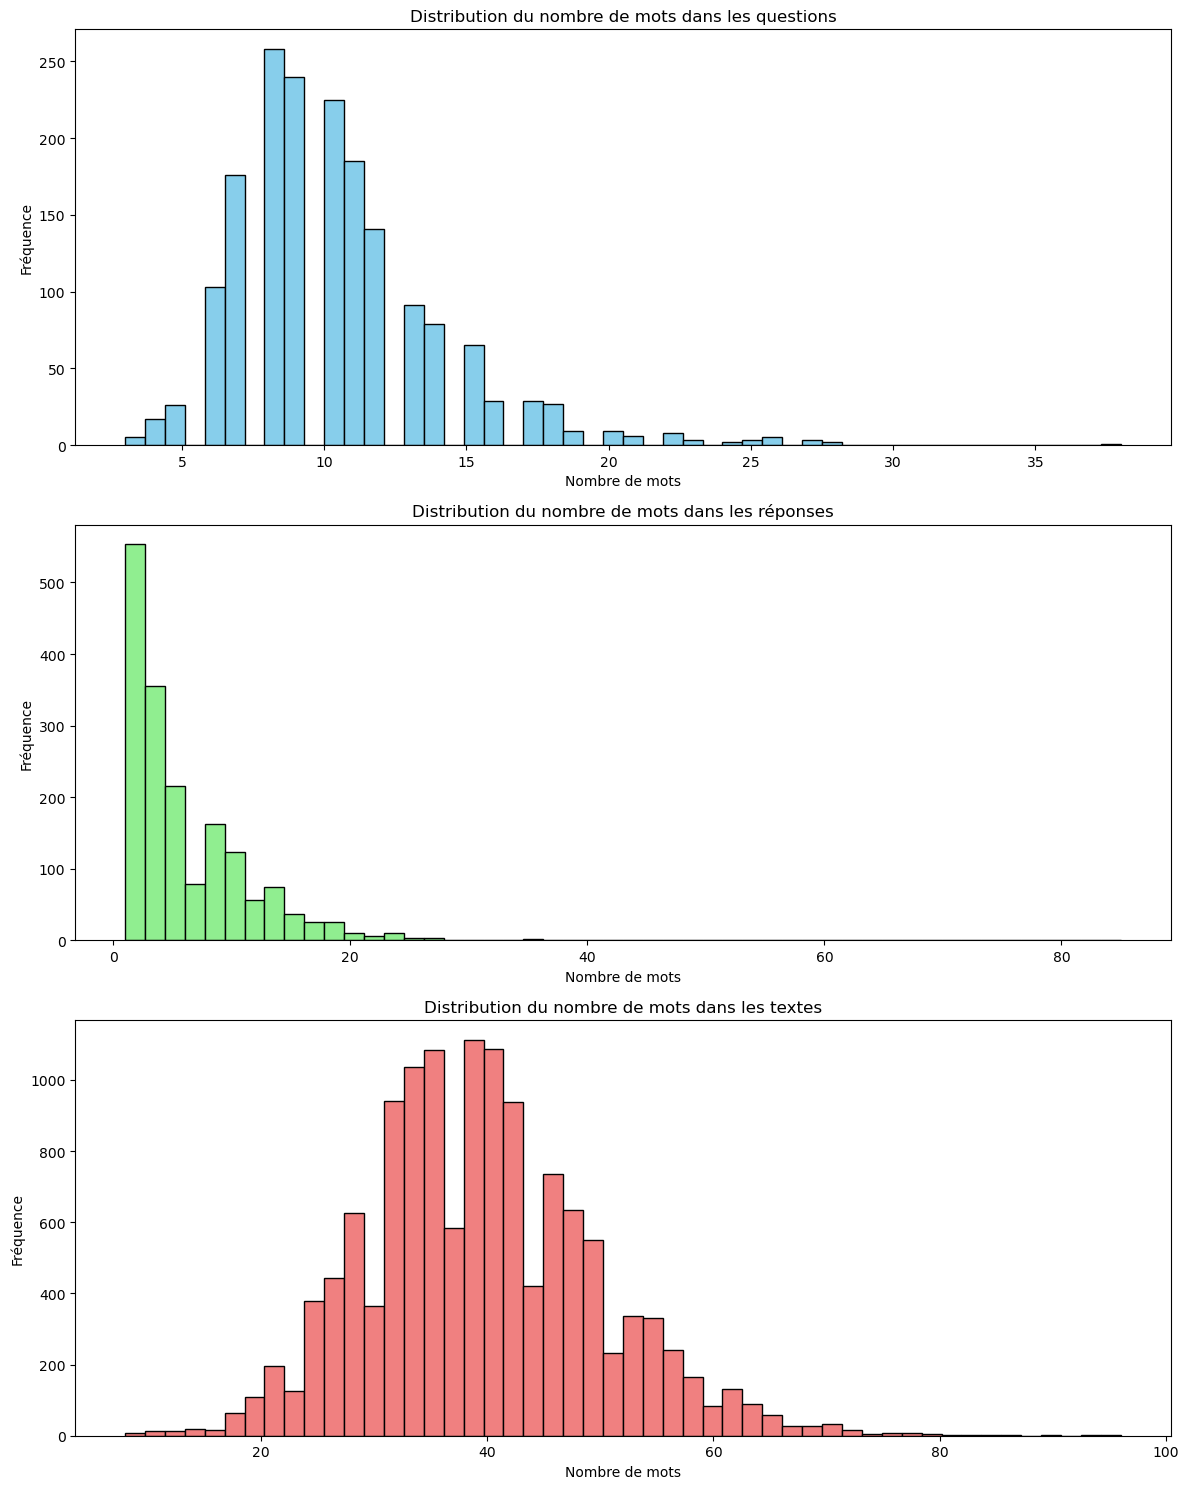

In [35]:
# TODO
train_data['question_word_count'] = train_data['question'].apply(lambda x: len(x.split()))
train_data['answer_word_count'] = train_data['answer'].apply(lambda x: len(x.split()))
texts_data['text_word_count'] = texts_data['text'].apply(lambda x: len(x.split()))

fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Histogramme pour les questions
axes[0].hist(train_data['question_word_count'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution du nombre de mots dans les questions')
axes[0].set_xlabel('Nombre de mots')
axes[0].set_ylabel('Fréquence')

# Histogramme pour les réponses
axes[1].hist(train_data['answer_word_count'], bins=50, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribution du nombre de mots dans les réponses')
axes[1].set_xlabel('Nombre de mots')
axes[1].set_ylabel('Fréquence')

# Histogramme pour les textes
axes[2].hist(texts_data['text_word_count'], bins=50, color='lightcoral', edgecolor='black')
axes[2].set_title('Distribution du nombre de mots dans les textes')
axes[2].set_xlabel('Nombre de mots')
axes[2].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()
# TODO

COMMENTAIRE: 

Beaucoup plus de mots dans les textes (moyenne de ...) et dans les questions (moyenne de 10) que dans les réponses (moyenne de 6).

### 2.2. Chargement du modèle et génération des réponses (5 points)

Nous allons maintenant évaluer la performance d'un modèle de langue à répondre aux questions de l'ensemble de validation. Chargez d'abord le modèle **'microsoft/Phi-3-mini-128k-instruct'** avec la librairie `transformers` de huggingface et générez les réponses du modèle à partir de la question. Générez au maximum 32 nouveaux jetons.

In [ ]:
# TODO
# TODO

torch.random.manual_seed(0)

# Charger le modèle pré-entraîné
model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3-mini-128k-instruct",
    device_map="cuda",  # Utilisation du GPU si disponible
    torch_dtype="auto",
    trust_remote_code=True,
)

# Charger le tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-128k-instruct")

# Créer le pipeline de génération de texte
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
)

# Charger l'ensemble de validation
val_data = pd.read_csv('data/questions_val.csv')

# Définir les arguments pour la génération
generation_args = {
    "max_new_tokens": 32,
    "return_full_text": False,
    "temperature": 0.0,  # Contrôle de la créativité
    "do_sample": False,   # Permet la variation des réponses
}

# Générer des réponses pour chaque question de l'ensemble de validation
generated_responses = []
for question in val_data['question']:
    # Construire le message pour le modèle
    messages = [
        {"role": "system", "content": "You are a helpful AI assistant."},
        {"role": "user", "content": question}
    ]

    # Générer la réponse
    output = pipe(messages, **generation_args)
    generated_response = output[0]['generated_text']
    generated_responses.append(generated_response)

# Ajouter les réponses générées dans le DataFrame de validation
val_data['generated_response'] = generated_responses

# Afficher quelques exemples
print(val_data[['question', 'generated_response']].head())


# END TODO
# END TODO

### 2.3. Évaluation des réponses (3 points)

Complétez la fonction `evaluate_bleu` et utilisez la métrique BLEU pour évaluer les réponses générées par rapport aux réponses attendues sur le jeu de validation. Évaluez votre modèle avec les métriques BLEU-1 et BLEU-2. BLEU-1 ne considère que les unigrammes pour évaluer la réponse et BLEU-2 considère les bigrammes aussi. Pour séparer une séquence en mots, vous pouvez simplement utiliser la fonction `split()`.

In [ ]:
def evaluate_bleu(df_true: pd.DataFrame, df_pred: pd.DataFrame, bleu_type: int):
    """
    Évalue les réponses générées en utilisant la métrique BLEU.

    Paramètres:
    df_true (pd.DataFrame): DataFrame contenant les vraies réponses avec des colonnes 'id' et 'answer'.
    df_pred (pd.DataFrame): DataFrame contenant les réponses prédites avec des colonnes 'id' et 'answer'.
    bleu_type (int): Nombre (soit 1 ou 2) correspondant aux n-grammes considérés pour la métrique (bleu_type = 1 : BLEU-1, bleu_type = 2 : BLEU-2)

    Retourne:
    float: Score BLEU moyen sur toutes les entrées.
    """
    # TODO
    bleu_scores = []
    weights = (1, 0, 0, 0) if bleu_type == 1 else (0.5, 0.5, 0, 0)
    # df_merged = pd.merge(df_true, df_pred, on='id', suffixes=('_true', '_pred'))
    for i in range(len(df_true)):
        reference = [df_true[i].split()]  # La référence doit être une liste de mots dans une liste
        candidate = df_pred[i].split()    # Le candidat doit être une liste de mots
        score = sentence_bleu(reference, candidate, weights=weights)
        bleu_scores.append(score)

    # Calculer la moyenne des scores BLEU
    mean_bleu_score = sum(bleu_scores) / len(bleu_scores)
    return mean_bleu_score

    # END TODO

In [ ]:
# TODO
mean_bleu_1 = evaluate_bleu(val_data["answer"], val_data["generated_response"], bleu_type=1)
mean_bleu_2 = evaluate_bleu(val_data["answer"], val_data["generated_response"], bleu_type=2)

print(f"Score BLEU-1 moyen: {mean_bleu_1:.4f}")
print(f"Score BLEU-2 moyen: {mean_bleu_2:.4f}")
# TODO

### 2.4. Commentaire (2 points)

Reportez, puis commentez la performance obtenue ici.

Performance obtenue:

## 3. Approche RAG figé (45 points)

Dans cette partie, vous allez implémenter une approche simple de RAG figé. On dit ici que le modèle est figé car on ne ré-entraîne aucun modèle. Vous implémenterez deux variantes : avec ou sans l'utilisation d'un algorithme d'indexation.

Dans la méthode d'implémentation du RAG figé, vous allez d'abord retrouver les passages pertinents pour chaque question avec un modèle de plongements de type Transformers, puis générer une réponse conditionnée par ces passages.

Dans cette partie, on utilisera
- le modèle de plongements (embedding-model) **[BAAI/bge-small-en-v1.5](https://huggingface.co/BAAI/bge-small-en-v1.5)** pour obtenir les vecteur de plongements des questions et des passages
- le modèle de génération (generative-model) **[microsoft/Phi-3-mini-128k-instruct](https://huggingface.co/microsoft/Phi-3-mini-128k-instruct)** pour générer les réponses

### 3.1 RAG figé sans indexation (23 points)

#### 3.1.1 Passages pertinents (8 points)

Pour retrouver les passages pertinents, vous devez d'abord encoder les questions et les passages avec le modèle de plongements. Puis, vous devez calculer la similarité cosinus entre les questions et les passages pour retrouver les $k$ passages les plus pertinents pour chaque question.

In [16]:
# TODO

# END TODO

In [17]:
def encode_sequences(sequences: list, tokenizer, model, device = DEVICE, batch_size = BATCH_SIZE):
    """
    Encode les textes en utilisant le modèle passé en paramètre pour générer les plongements des textes

    Paramètres:
    sequences    : Liste de séquence à transformer en plongements
    tokenizer   : Segmenteur du modèle de plongements
    model       : Modèle de plongements
    device      : Machine sur laquelle les opérations doivent être effectuées
    batch_size  : Taille des lots lors de la génération des traitements
    """
    # TODO

    # END TODO

In [18]:
# TODO

# END TODO

#### 3.1.2 Évaluation des passages retrouvés avec Recall@k et precision@k (7 points)

Maintenant que les passages ont tous été encodés, on peut évaluer si les passages retrouvés sont pertinents. En prenant les $k$ premiers passages, on peut évaluer si on retrouve les bons passages associés aux questions. C'est un des avantages du système RAG : on peut évaluer de façon indépendante la qualité du système qui retrouve les passages pertinents et de celui qui génère les réponses. Cela permet notamment d'évaluer quels sont les points forts et points faibles du système.

Pour cela, vous allez utiliser les métriques **Precision@k** et **Recall@k** définies dans les équations suivantes. Implémentez ces métriques.

$$\text{Precision@k} = \frac{\text{Nombre d'éléments pertinents dans les k premiers}}{k}$$

$$\text{Recall@k} (Rappel@k) = \frac{\text{Nombre d'éléments pertinents dans les k premiers}}{\text{Nombre total d'éléments pertinents}}$$


In [19]:
def compute_recall_at_k(ground_truth, predictions):
    """
    Calcule la métrique du "Recall@k". On assume que predictions contiennent le bon nombre de passages (=k)

    Paramètres:
    ground_truth : Liste contenant tous les vrais passages associés aux questions (ex : [[1, 2, 3], [4, 5, 6]] si les passages de la question 1 sont [1, 2, 3] et 
    les passages de la question 2 sont [4, 5, 6])
    predictions : Liste contenant tous les passages retrouvés pour chacune des questions formattée de la même manière que `ground_truth`

    Retourne:
    Recall moyen
    """
    # TODO

    # END TODO

In [20]:
def compute_precision_at_k(ground_truth, predictions):
    """
    Calcule la métrique du "Precision@k". On assume que predictions contiennent le bon nombre de passages (=k)

    Paramètres:
    ground_truth : Liste contenant tous les vrais passages associés aux questions (ex : [[1, 2, 3], [4, 5, 6]] si les passages de la question 1 sont [1, 2, 3] et 
    les passages de la question 2 sont [4, 5, 6])
    predictions : Liste contenant tous les passages retrouvés pour chacune des questions formattée de la même manière que `ground_truth`

    Retourne: 
    Précision moyenne
    """

    # TODO

    # END TODO


#### 3.1.3 Résultat d'évaluation (5 points)
Implémentez la fonction _'retrieve_passages'_ qui retourne les indices des $k$ passages les plus similaires pour une question. Utilisez la similarité cosinus pour comparer les passages et les questions. Évaluez ensuite votre modèle récupérant les passages avec les métriques Precision@k et Recall@k sur le jeu de validation. Calculez avec $k={1, 2, 3, 4, 5}$.

In [31]:
def retrieve_passages(questions: list, passage_embed: torch.Tensor, k: int, embedding_model_tokenizer, embedding_model):
    """
    Retourne les k passages les plus pertinents pour chaque question passée en paramètre

    Paramètres:
    questions       : Les questions pour lesquelles on cherche les passages les plus pertinents
    passage_embed   : Tenseur contenant les plongements de chaque passage (n, dim)
    k               : le nombre de passages à retourner
    tokenizer       : Segmenteur du modèle de plongements
    model           : Modèle de plongements

    Retourne:
    Les indices des k passages les plus pertinents pour la question
    """
    # TODO

    # END TODO


In [ ]:
# TODO

# END TODO

#### 3.1.4 Graphique (3 points)
Affichez maintenant un graphique de vos résultats de la question précédente en mettant à l'axe des x la valeur de $k$ et à l'axe des y la valeur de la précision et du rappel. Quel est le nombre optimal de passages à passer au modèle en vous basant sur le recall@k et precision@k ? Pourquoi ?

In [ ]:
# TODO

# END TODO

### 3.2 RAG figé avec FAISS (14 points)

Maintenant on vous demande d'utiliser FAISS pour l'indexation des plongements des passages.

[FAISS (Facebook AI Similarity Search)](https://ai.meta.com/tools/faiss/) est une bibliothèque open-source développée par Meta pour la recherche de similarité rapide sur des vecteurs denses, comme des embeddings de textes ou d'images. Elle est optimisée pour gérer de grands volumes de données en haute dimension et peut être accélérée avec des GPU. FAISS est largement utilisée pour des systèmes de recommandation ou la recherche d'information à grande échelle. Pour plus de détails, veuillez consulter  [le tutoriel sur Moodle](https://moodle.polymtl.ca/course/view.php?id=2813).


#### 3.2.1 Initialisez l'indexation FAISS avec les plongements des passages (2 points)

Utilisez les plongements des passages générés au niveau de la question 3.1.1 et indexez-les avec FAISS. Vérifiez que le nombre de plongements dans l'objet FAISS est bien le même que le nombre de passages. N'oubliez pas qu'on veut une indexation basée sur la similarité cosinus.

In [ ]:
# TODO

# END TODO

#### 3.2.2 Récupération des passages avec FAISS (4 points)

Implémentez la fonction _'retrieve_passages_faiss'_ qui retourne les indices des $k$ passages les plus similaires pour une question à l'aide d'un indexation FAISS


In [35]:
def retrieve_passages_faiss(questions: list, vector_index: faiss.IndexFlatL2, k: int, embedding_model_tokenizer, embedding_model):
    """
    Retourne les k passages les plus pertinents pour chaque question passée en paramètre

    Paramètres:
    questions       : Les questions pour lesquelles on cherche les passages les plus pertinents
    vector_index    : L'objet d'indexation FAISS
    k               : le nombre de passages à retourner
    tokenizer       : Segmenteur du modèle de plongements
    model           : Modèle de plongements

    Retourne:
    Les indices des k passages les plus pertinents pour la question
    """
    # TODO

    # END TODO

#### 3.2.3 Exécution de FAISS (4 points)

Exécutez maintenant la fonction _"retrieve_passages_faiss"_ pour récupérer les bons passages pour les questions du jeu de validation avec votre k optimal.

In [ ]:
# TODO

# END TODO


#### 3.2.4 Calculez les métriques Precision@K et Rappel@K pour les passages retrouvés avec FAISS avec votre k optimal (2 points) 

In [ ]:
# TODO

# END TODO

#### 3.2.5 Quelle remarque pouvez-vous faire sur l'utilisation de FAISS en termes de passages retrouvés, de temps d'exécution et de tout autre élément qui vous semble approprié ? (2 points)

> Réponse

### 3.3 Génération des réponses (5 points)

Générez maintenant les réponses des questions sur l'ensemble de validation avec les passages récupérés. Pour générer les réponses, vous devez concaténer les passages pertinents avec la question et donner le tout au modèle de génération. Faites-le sur l'ensemble du jeu de validation. Pour la méthode, vous avez le choix entre les passages retrouvés avec FAISS ou manuellement (avec votre propre implémentation). Faites cela pour toutes les valeurs de $k$: (1, 2, 3 et 4).

In [49]:
# TODO
# Générez les prompts
# END TODO

Affichez un exemple d'invite (prompt) qui sera envoyé au modèle de génération

In [ ]:
# TODO
# Affichez un exemple d'invite
# END TODO

In [ ]:
# TODO
# Envoyez les prompts au modèle
# END TODO

### 3.4 Évaluation des réponses (3 points)

Utilisez la métrique BLEU (BLEU-1 et BLEU-2) pour évaluer les réponses générées par rapport aux réponses attendues sur le jeu de validation. 

In [ ]:
# TODO

# END TODO

En vous basant sur les résultats de génération du modèle sur l'ensemble de validation, quel est le nombre optimal de passages à passer au modèle ? Qu'en concluez-vous par rapport au nombre optimal de passages trouvé à la question 3.1.4 ?

> Réponse

### 3.5 Test de soumission Kaggle
Faites également une soumission Kaggle de votre modèle RAG sur le fichier de test et reportez la valeur obtenue ici.


## 4. Compétition Kaggle (40 points)

Dans cette partie, vous devez implémenter votre propre méthode pour répondre aux questions. Pour rappel, vous ne pouvez pas utiliser de données externes pour entraîner vos modèles, seulement les données fournies, et vous devez utiliser le modèle de génération **'microsoft/Phi-3-mini-128k-instruct'**.

Proposez une architecture plus complexe, ou améliorez les modèles des parties précédentes, afin d’obtenir un score plus élevé que vos autres modèles sur l’ensemble de validation ET dans la compétition Kaggle. Démontrez bien cette amélioration dans votre notebook dans les cellules suivantes. Un autre objectif est d'obtenir le meilleur score de la classe. 

Vous devez commencer cette démarche par un état de l'art.

### 4.1. État de l'art (5 points)

Décrivez en **deux paragraphes**, dans une cellule du notebook, avec les références appropriées, les approches de l’état de l’art pour la tâche que vous tentez d'accomplir. Utilisez une recherche dans Google Scholar.

En vous basant sur vos recherches, quelles sont les meilleures techniques de l’état de l’art ?  Soyez brefs et clairs. Attention, on ne vous demande pas les détails d'un papier particulier mais une synthèse des meilleures approches de l'état de l'art.

Synthèse:


Références: Listez vos références de manière appropriée (4-5 parmi les meilleures approches)


### 4.2. Description de votre méthode (5 points)

Décrivez en deux paragraphes l'architecture proposée en soulignant notamment les additions ou l'originalité de l'approche et comment l'état de l'art l'a inspirée

### 4.3. Implémentation (20 points)

Implémentez votre modèle ci-dessous dans une ou plusieurs cellules (veillez à la qualité de votre code) et effectuez votre soumission sur Kaggle en respectant le format de soumission.

### 4.4. Évaluation (2 points)

#### 4.4.1. Évaluez votre modèle sur le jeu de validation en utilisant la métrique BLEU-2 (1 point)

#### 4.4.2 Comparez les résultats obtenus avec les modèles précédents sur l'ensemble de validation. Quelles sont vos conclusions? (1 point)

### 4.5. Analyse (8 points)
#### 4.5.1. Avantages/limites/Erreurs types (5 points)
En quelques phrases précises, discutez des avantages et limites de votre meilleure architecture. Analysez les cas d’erreur.

#### 4.5.2. Améliorations potentielles (3 points)

Indiquez deux pistes d’amélioration futures potentielles et pourquoi vous pensez qu'elles permettraient d'obtenir de meilleurs résultats en vous basant sur un raisonnement logique ou sur des références à l'état de l'art